In [617]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [618]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


# Predicting house prices in London

 ## Objective
 
 1. Understand factors that impact house prices in London. 
 2. Predict house price based on the 'London.csv' dataset. This is a Regression problem.

## Import Libaries

In [619]:
import pandas as pd
import numpy as np
import requests

## Import data 

In [620]:
# import london house price dataset
data = pd.read_csv('London.csv')

In [621]:
data.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [622]:
data.shape

(3480, 11)

We can see that there are 3480 rows and 11 columns in our data set

In [623]:
data.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


We see some info about our data i.e. minimum number of bedrooms is 0 and maximum is 10. On average the properties have 3.1 bedrooms. 

In [624]:
data.dtypes

Unnamed: 0            int64
Property Name        object
Price                 int64
House Type           object
Area in sq ft         int64
No. of Bedrooms       int64
No. of Bathrooms      int64
No. of Receptions     int64
Location             object
City/County          object
Postal Code          object
dtype: object

We can see a combination intergers and strings/objects in our dataset

In [625]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [626]:
# check number of null values
data.isnull().sum()

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

We see that 962 of the Locations are null.

## Data Wrangling

In [627]:
# We rename the unnamed column and asssign to a new DataFrame
df = data.rename(columns={'Unnamed: 0': 'Id'})

In [628]:
df.head()

,Id,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [629]:
df = df.drop(['Id', 'Property Name', 'Location'], axis=1)

Since 1/3 of our locations are null we will drop this column.
We are not interested in the 'property name' or the 'Id' as it does not impact price of a house, so we will drop this too.


In [630]:
df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code
0,1675000,House,2716,5,5,5,London,SW19 8NY
1,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA
2,735000,Flat / Apartment,761,2,2,2,London,SW15 1QL
3,1765000,House,1986,4,4,4,London,SW15 1LP
4,675000,Flat / Apartment,700,2,2,2,London,SW15 1PL


We create 'Price in (million)' column to make analysis easier 

In [631]:
df['Price (million)'] = df['Price']/1000000

In [632]:
df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Price (million)
0,1675000,House,2716,5,5,5,London,SW19 8NY,1.675
1,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA,0.650
2,735000,Flat / Apartment,761,2,2,2,London,SW15 1QL,0.735
3,1765000,House,1986,4,4,4,London,SW15 1LP,1.765
4,675000,Flat / Apartment,700,2,2,2,London,SW15 1PL,0.675


In [633]:
df[['No. of Bedrooms','No. of Bathrooms','No. of Receptions']]

,No. of Bedrooms,No. of Bathrooms,No. of Receptions
0,5,5,5
1,2,2,2
2,2,2,2
3,4,4,4
4,2,2,2
...,...,...,...
3475,3,3,3
3476,3,3,3
3477,6,6,6
3478,3,3,3


We see that there is an issue with the data. 
Each row has the same number of bedrooms, bathrooms and receptions. 
Therefor we will delete the no. of bathrooms and receptions columns
We will only use number of bedrooms.

In [634]:
df = df.drop(['No. of Receptions', 'No. of Bathrooms'], axis=1)

In [635]:
df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,City/County,Postal Code,Price (million)
0,1675000,House,2716,5,London,SW19 8NY,1.675
1,650000,Flat / Apartment,814,2,London,EC1V 3PA,0.650
2,735000,Flat / Apartment,761,2,London,SW15 1QL,0.735
3,1765000,House,1986,4,London,SW15 1LP,1.765
4,675000,Flat / Apartment,700,2,London,SW15 1PL,0.675


Lets take a closer look at the postal code

In [636]:
# look at first 2 letters of postal code
df['Postcode 2'] = df['Postal Code'].str.slice(stop=2)
df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,City/County,Postal Code,Price (million),Postcode 2
0,1675000,House,2716,5,London,SW19 8NY,1.675,SW
1,650000,Flat / Apartment,814,2,London,EC1V 3PA,0.650,EC
2,735000,Flat / Apartment,761,2,London,SW15 1QL,0.735,SW
3,1765000,House,1986,4,London,SW15 1LP,1.765,SW
4,675000,Flat / Apartment,700,2,London,SW15 1PL,0.675,SW


In [637]:
counts = df['Postcode 2'].value_counts(sort=True)
counts

SW    1525
NW     256
W1     240
KT     191
N1     145
E1     141
TW      93
EC      92
W4      81
HA      66
SE      65
W8      64
IG      53
W5      42
W2      41
W9      40
E8      40
E9      40
W6      37
N7      36
N5      26
E2      23
WC      21
N6      20
E3      18
W3      16
WD      14
N4      10
CR       9
E5       8
EN       5
N8       4
CM       4
UB       3
N2       3
RM       3
W7       2
E4       1
BR       1
SM       1
Name: Postcode 2, dtype: int64

In [638]:
df.shape

(3480, 8)

We can see that the 6 most common postcode reagions are SW','NW','W1','KT','N1','E1'.
We will use these postcode areas for our analysis as they collectively outnumber the other postcode areas significantly. 
We can also update the number of areas by updating the code below. 

## Create new DataFrame for 6 postcode areas

In [639]:
# We will look at the 6 most popular postal codes
postcodes = ['SW','NW','W1','KT','N1','E1']

#create new data frame
df2 = df[df['Postcode 2'].isin(postcodes)]

In [640]:
df2.sort_values('Price (million)',ascending=False).head(30)

,Price,House Type,Area in sq ft,No. of Bedrooms,City/County,Postal Code,Price (million),Postcode 2
1851,39750000,New development,5623,5,London,W1K 4AB,39.750,W1
3352,34000000,House,7798,6,London,SW1X 9RU,34.000,SW
3434,25000000,New development,8356,5,London,SW1A 1LP,25.000,SW
3420,25000000,House,12435,5,London,NW8 9UJ,25.000,NW
3306,23950000,New development,15405,7,London,NW11,23.950,NW
3449,21000000,Penthouse,5417,5,London,SW7 1JF,21.000,SW
3473,19950000,Flat / Apartment,3698,5,London,W1K 7AJ,19.950,W1
2789,19450000,Flat / Apartment,4699,5,London,SW1X 0AD,19.450,SW
3299,19000000,House,6796,7,London,SW1X 8RN,19.000,SW
3218,18950000,Flat / Apartment,3541,4,London,W1K 6LE,18.950,W1


In [641]:
# We do not want to include outliers so we limit the data to <= £10 million 
df2 = df2[df2['Price (million)'] <= 10]

In [642]:
df2.shape

(2461, 8)

In [643]:
df2['City/County'].value_counts()

London                      2225
Surrey                       188
Thurleigh Road                 7
Fulham                         5
Wornington Road                5
Marylebone                     4
Chelsea                        3
Wandsworth                     2
Battersea                      2
N1 6FU                         1
Oxshott                        1
London1500                     1
Queens Park                    1
6 Deal Street                  1
110 Battersea Park Road        1
Thames Ditton                  1
Wimbledon                      1
4 Circus Road West             1
27 Carlton Drive               1
Fitzrovia                      1
Fulham High Street             1
Spitalfields                   1
82-88 Fulham High Street       1
Chessington                    1
The Metal Works                1
Ealing                         1
De Beauvoir                    1
Holland Park                   1
Lillie Square                  1
Name: City/County, dtype: int64

Also we see that some values in the City/County column have been entered incorrectly. 

In [644]:
# We will replace values with count <=7 with the most common value which London.
df2['City/County'] = df2['City/County'].apply(lambda x: 'London' if df2['City/County'].value_counts()[x] <= 7 else x)

In [645]:
df2['City/County'].value_counts()

London    2273
Surrey     188
Name: City/County, dtype: int64

In [646]:
df2.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,City/County,Postal Code,Price (million),Postcode 2
0,1675000,House,2716,5,London,SW19 8NY,1.675,SW
2,735000,Flat / Apartment,761,2,London,SW15 1QL,0.735,SW
3,1765000,House,1986,4,London,SW15 1LP,1.765,SW
4,675000,Flat / Apartment,700,2,London,SW15 1PL,0.675,SW
6,1475000,House,1548,4,London,SW11 6NW,1.475,SW


Since we are no longer using 'Price' and 'Postal Code' we will drop now. 

In [647]:
df2 = df2.drop(['Price','Postal Code'], axis=1)

We now move target variable 'Price (million)' to end of DataFrame

In [648]:
Price_col = df2.pop('Price (million)')
df2.insert(len(df2.columns), 'Price (million)', Price_col)

Lets see our new DataFrame: 
1. Postcode has been changed to the region only.
2. The only rooms we are now interested in is bedroom. 
3. Price of property is now in millions.

In [649]:
df2.head()

,House Type,Area in sq ft,No. of Bedrooms,City/County,Postcode 2,Price (million)
0,House,2716,5,London,SW,1.675
2,Flat / Apartment,761,2,London,SW,0.735
3,House,1986,4,London,SW,1.765
4,Flat / Apartment,700,2,London,SW,0.675
6,House,1548,4,London,SW,1.475


Now that the data has been cleaned we will move on to the next stage

## Exploratory Data analysis 

In [650]:
df2.describe()

,Area in sq ft,No. of Bedrooms,Price (million)
count,2461.00000,2461.000000,2461.000000
mean,1686.72369,3.091833,1.767943
std,1284.71007,1.489700,1.547126
min,277.00000,0.000000,0.210000
25%,850.00000,2.000000,0.775000
50%,1326.00000,3.000000,1.250000
75%,2145.00000,4.000000,2.150000
max,12546.00000,10.000000,10.000000


In [651]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 0 to 3478
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   House Type       2461 non-null   object 
 1   Area in sq ft    2461 non-null   int64  
 2   No. of Bedrooms  2461 non-null   int64  
 3   City/County      2461 non-null   object 
 4   Postcode 2       2461 non-null   object 
 5   Price (million)  2461 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 134.6+ KB


In [652]:
df2.shape

(2461, 6)

In [653]:
df2.dtypes

House Type          object
Area in sq ft        int64
No. of Bedrooms      int64
City/County         object
Postcode 2          object
Price (million)    float64
dtype: object

## Data Visualization

In [654]:
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [655]:
df2.head()

,House Type,Area in sq ft,No. of Bedrooms,City/County,Postcode 2,Price (million)
0,House,2716,5,London,SW,1.675
2,Flat / Apartment,761,2,London,SW,0.735
3,House,1986,4,London,SW,1.765
4,Flat / Apartment,700,2,London,SW,0.675
6,House,1548,4,London,SW,1.475


In [656]:
#calculate number of house types 
property_counts = df2['House Type'].value_counts()
property_counts

Flat / Apartment    1143
House               1014
New development      225
Penthouse             64
Studio                 7
Duplex                 6
Mews                   2
Name: House Type, dtype: int64

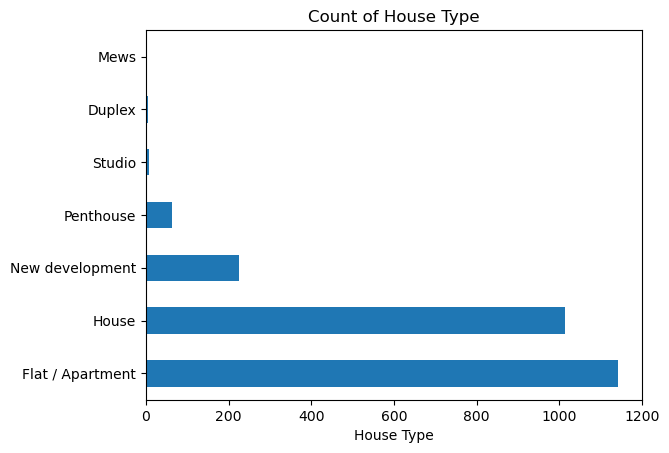

In [657]:
property_counts.plot(kind='barh')
plt.xlabel('House Type')
plt.title('Count of House Type')
plt.show()

We see that Flat / Apartment and House are the most common property types.
Mews, Duplex and Studio apratments are not very popular.

### Create Bar Chart of 'No. of Bedrooms' vs 'Average Price' for a house 

In [658]:
avg_price_by_bedrooms = df2.groupby('No. of Bedrooms')['Price (million)'].mean().reset_index()
avg_price_by_bedrooms.columns = ['No. of Bedrooms', 'Average Price']
avg_price_by_bedrooms

,No. of Bedrooms,Average Price
0,0,0.379714
1,1,0.654520
2,2,1.152643
3,3,1.899602
4,4,2.256623
5,5,2.417157
6,6,3.559828
7,7,3.883710
8,8,6.292857
9,10,9.975000


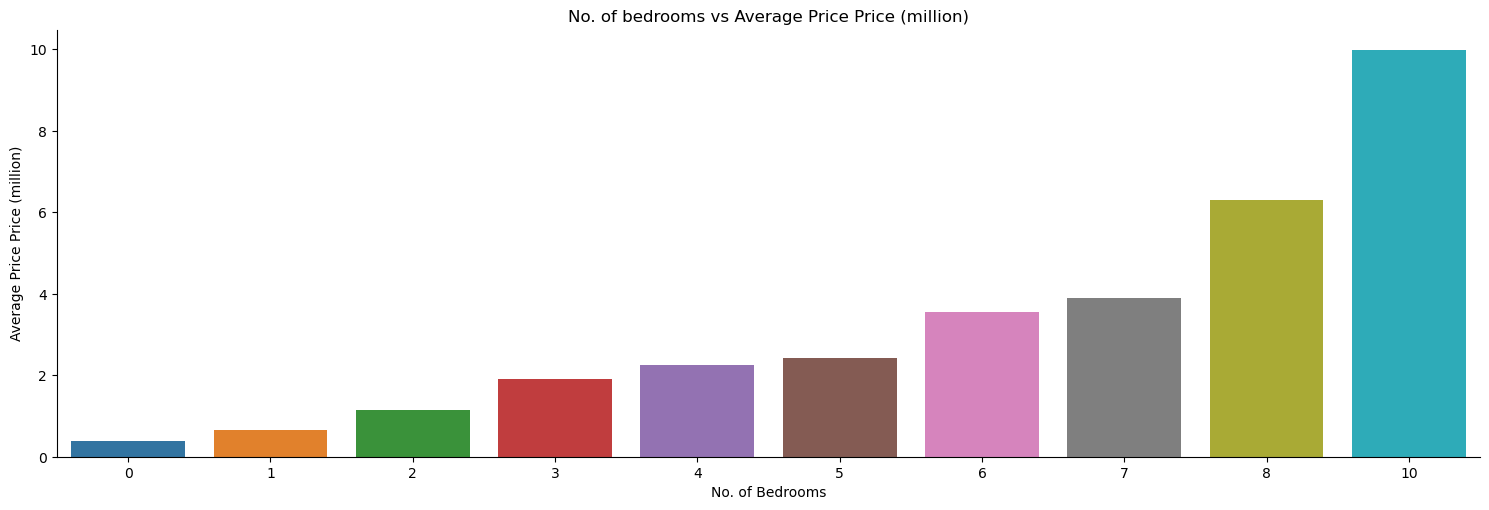

In [659]:
sns.catplot(x='No. of Bedrooms', y='Average Price', data=avg_price_by_bedrooms, aspect=3, kind ='bar' )

plt.xlabel('No. of Bedrooms')
plt.ylabel('Average Price Price (million)')
plt.title('No. of bedrooms vs Average Price Price (million)', )
plt.show()

Result:
We see that increasing no. of bedrooms equals an increase in house price 

## Create Bar Chart of 'House Type' vs 'Average Price'

In [660]:
# create a new dataframe with the average price for each house type
avg_price_by_hometype = df2.groupby('House Type')['Price (million)'].mean().reset_index()
avg_price_by_hometype.columns = ['House Type', 'Average Price']
avg_price_by_hometype

,House Type,Average Price
0,Duplex,0.840000
1,Flat / Apartment,1.259422
2,House,2.262349
3,Mews,1.400000
4,New development,1.919698
5,Penthouse,2.735622
6,Studio,0.359286


In [661]:
avg_price_by_hometype = avg_price_by_hometype.sort_values('Average Price', ascending=False)
avg_price_by_hometype

,House Type,Average Price
5,Penthouse,2.735622
2,House,2.262349
4,New development,1.919698
3,Mews,1.400000
1,Flat / Apartment,1.259422
0,Duplex,0.840000
6,Studio,0.359286


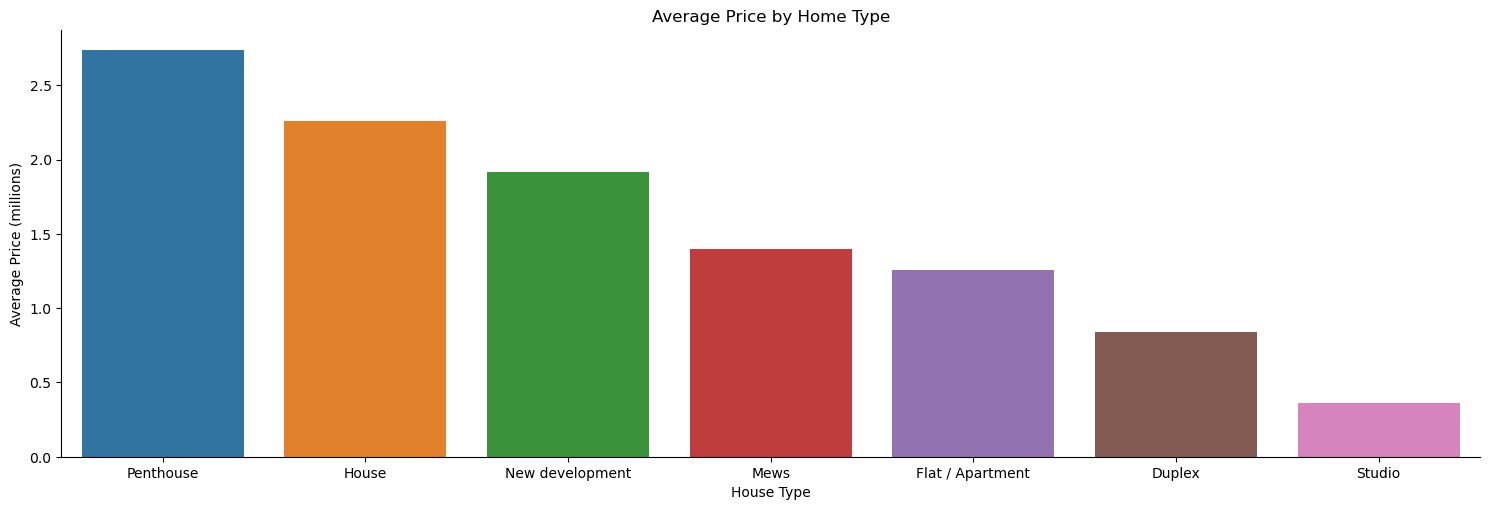

In [662]:
sns.catplot(x='House Type', y='Average Price', data=avg_price_by_hometype, aspect=3, kind = 'bar')

plt.xlabel('House Type')
plt.ylabel('Average Price (millions)')
plt.title('Average Price by Home Type')
plt.show()


Result: We see that 'Penthouse' is the most expensive house type on average and studio apartments are the cheapest on average

## Create scatter plot of 'Area in sq ft' vs ' Price of house ' 

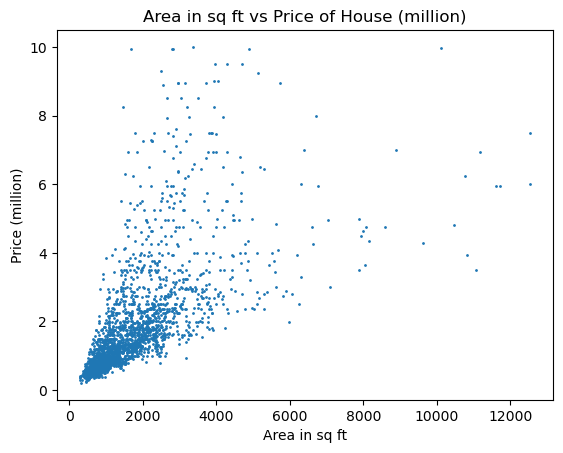

In [663]:
x=df2['Area in sq ft']
y=df2['Price (million)']
plt.scatter(x,y, s=1)

plt.xlabel('Area in sq ft')
plt.ylabel('Price (million)')
plt.title('Area in sq ft vs Price of House (million)')
plt.show()

Result: We see that an increase in area equals an increase in House price

## Create bar chart of 'Postcode region/district' vs ' Price of house '

In [664]:
mean_prices = df2.groupby("Postcode 2")["Price (million)"].mean().reset_index()
mean_prices.columns= ['Postcode 2','Average Price']
mean_prices

,Postcode 2,Average Price
0,E1,0.854020
1,KT,1.861209
2,N1,1.244634
3,NW,2.173121
4,SW,1.757732
5,W1,2.216831


In [665]:
df2_bar = mean_prices.sort_values('Average Price', ascending=False)
df2_bar

,Postcode 2,Average Price
5,W1,2.216831
3,NW,2.173121
1,KT,1.861209
4,SW,1.757732
2,N1,1.244634
0,E1,0.854020


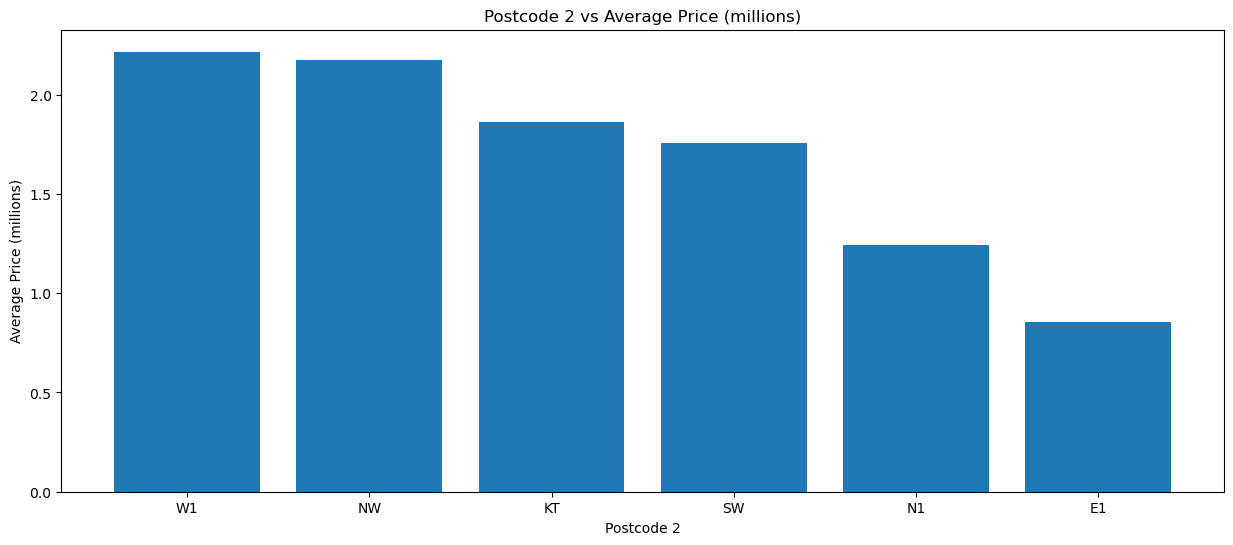

In [666]:
x=df2_bar['Postcode 2']
y=df2_bar['Average Price']

fig = plt.subplots(figsize=(15, 6))

plt.bar(x, y)
plt.xlabel('Postcode 2')
plt.ylabel('Average Price (millions)')
plt.title('Postcode 2 vs Average Price (millions)')

plt.show()

Result: We see that West London houses are more expensive. East London houses are cheaper.

## Create a map of these postcode locations: 

In [667]:
import folium

# create a Folium map centered on London
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=11)

# Define the coordinates for each area
sw_lat, sw_lon = 51.4652, -0.2198 # South West London
nw_lat, nw_lon = 51.5637, -0.2772 # North West London
w1_lat, w1_lon = 51.5142, -0.1417 # W1
kt_lat, kt_lon = 51.4123, -0.3007 # KT
n1_lat, n1_lon = 51.5465, -0.1058 # N1
e1_lat, e1_lon = 51.5203, -0.0293 # E1

# Add a circle for South West London
folium.Circle(
    location=[sw_lat, sw_lon], 
    radius=2000, # radius of circle in meters
    color='blue', 
    fill=True, 
    fill_color='blue', 
    tooltip='SW'
).add_to(london_map)

# Add a circle for North West London
folium.Circle(
    location=[nw_lat, nw_lon], 
    radius=2000, # radius of circle in meters
    color='green', 
    fill=True, 
    fill_color='green', 
    tooltip='NW'
).add_to(london_map)

# Add a circle for W1
folium.Circle(
    location=[w1_lat, w1_lon], 
    radius=2000, # radius of circle in meters
    color='red', 
    fill=True, 
    fill_color='red', 
    tooltip='W1'
).add_to(london_map)

# Add a circle for Kingston upon Thames London
folium.Circle(
    location=[kt_lat, kt_lon], 
    radius=2000, # radius of circle in meters
    color='purple', 
    fill=True, 
    fill_color='purple', 
    tooltip='KT'
).add_to(london_map)

# Add a circle for N1 London
folium.Circle(
    location=[n1_lat, n1_lon], 
    radius=2000, # radius of circle in meters
    color='orange', 
    fill=True, 
    fill_color='orange', 
    tooltip='N1'
).add_to(london_map)

# Add a circle for E1
folium.Circle(
    location=[e1_lat, e1_lon], 
    radius=2000, # radius of circle in meters
    color='brown', 
    fill=True, 
    fill_color='brown', 
    tooltip='E1'
).add_to(london_map)


# display the map
london_map


In [668]:
df2.head()

,House Type,Area in sq ft,No. of Bedrooms,City/County,Postcode 2,Price (million)
0,House,2716,5,London,SW,1.675
2,Flat / Apartment,761,2,London,SW,0.735
3,House,1986,4,London,SW,1.765
4,Flat / Apartment,700,2,London,SW,0.675
6,House,1548,4,London,SW,1.475


Since there is a clear variation of house price depending on post code. We do areas specific hous rice analysis. 

split into 6 datframes for each postal code region

In [669]:
df_n1 = df2[  df2['Postcode 2'] == 'N1'   ]
df_sw = df2[  df2['Postcode 2'] == 'SW'   ]
df_e1 = df2[  df2['Postcode 2'] == 'E1'   ]
df_kt = df2[  df2['Postcode 2'] == 'KT'   ]
df_w1 = df2[  df2['Postcode 2'] == 'W1'   ]
df_nw = df2[  df2['Postcode 2'] == 'NW'   ]


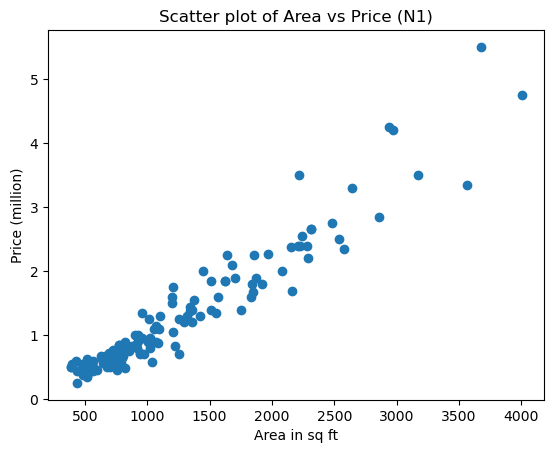

In [670]:
# Create a scatter plot with Matplotlib
x=df_n1['Area in sq ft']
y=df_n1['Price (million)']

plt.scatter(x,y)

# Add axis labels and title
plt.xlabel('Area in sq ft')
plt.ylabel('Price (million)')
plt.title('Scatter plot of Area vs Price (N1)')

# Show the plot
plt.show()


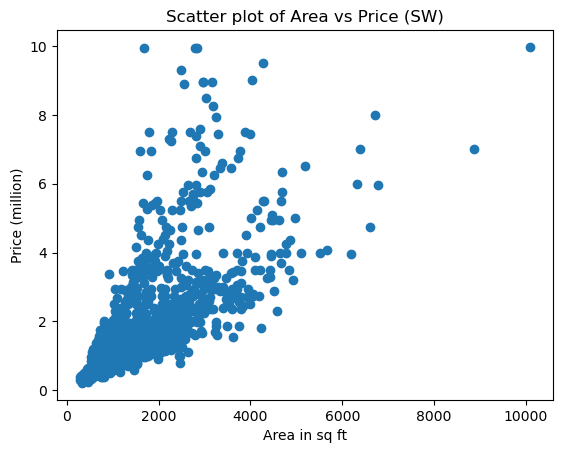

In [671]:
# Create a scatter plot with Matplotlib
x=df_sw['Area in sq ft']
y=df_sw['Price (million)']

plt.scatter(x,y)

# Add axis labels and title
plt.xlabel('Area in sq ft')
plt.ylabel('Price (million)')
plt.title('Scatter plot of Area vs Price (SW)')

# Show the plot
plt.show()

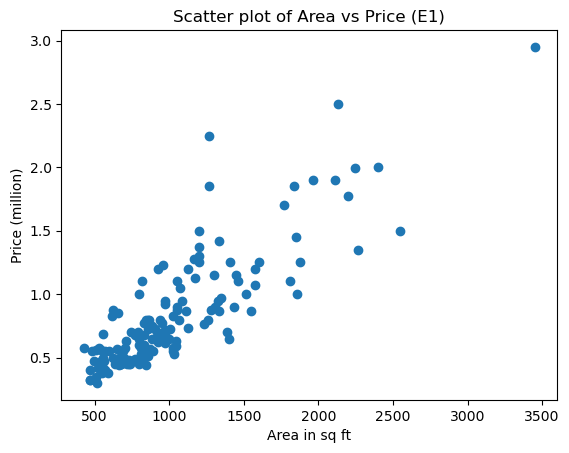

In [672]:
# Create a scatter plot with Matplotlib
x=df_e1['Area in sq ft']
y=df_e1['Price (million)']

plt.scatter(x,y)

# Add axis labels and title
plt.xlabel('Area in sq ft')
plt.ylabel('Price (million)')
plt.title('Scatter plot of Area vs Price (E1)')

# Show the plot
plt.show()

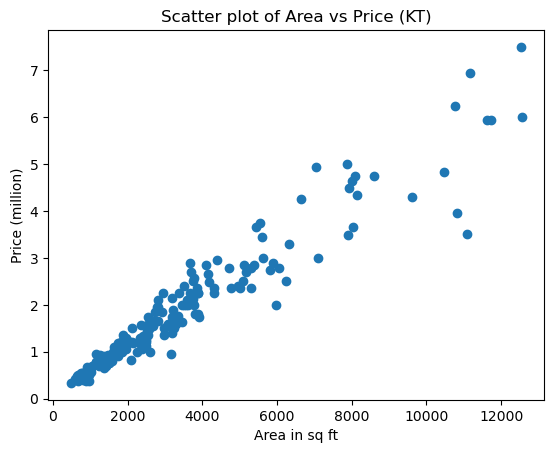

In [673]:
# Create a scatter plot with Matplotlib
x=df_kt['Area in sq ft']
y=df_kt['Price (million)']

plt.scatter(x,y)

# Add axis labels and title
plt.xlabel('Area in sq ft')
plt.ylabel('Price (million)')
plt.title('Scatter plot of Area vs Price (KT)')

# Show the plot
plt.show()

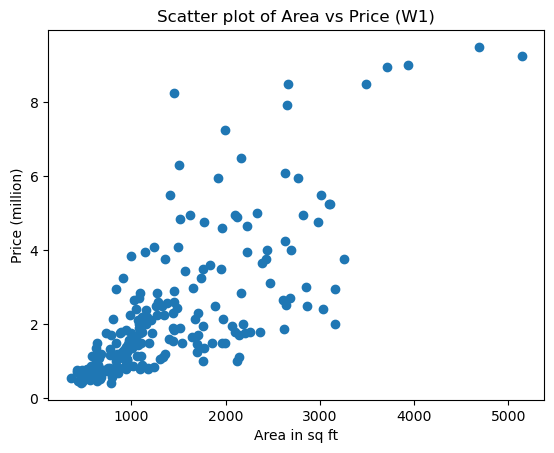

In [674]:
# Create a scatter plot with Matplotlib
x=df_w1['Area in sq ft']
y=df_w1['Price (million)']

plt.scatter(x,y)

# Add axis labels and title
plt.xlabel('Area in sq ft')
plt.ylabel('Price (million)')
plt.title('Scatter plot of Area vs Price (W1)')

# Show the plot
plt.show()

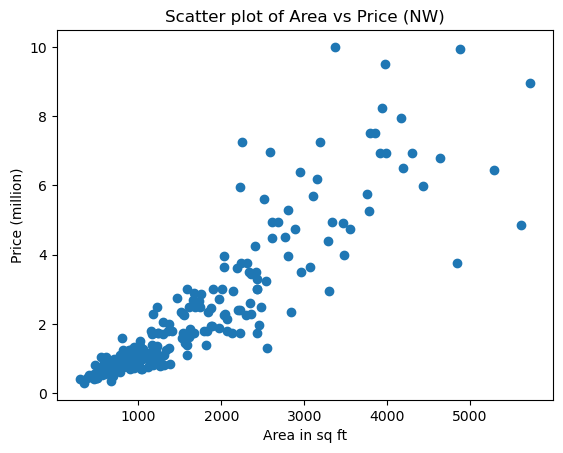

In [675]:
# Create a scatter plot with Matplotlib
x=df_nw['Area in sq ft']
y=df_nw['Price (million)']

plt.scatter(x,y)

# Add axis labels and title
plt.xlabel('Area in sq ft')
plt.ylabel('Price (million)')
plt.title('Scatter plot of Area vs Price (NW)')

# Show the plot
plt.show()

Result: We can see from our graphs that some post code regions have a strong link between 'area' and 'price' (ie N1). Others have a weaker correlation (ie SW london)

## Machine Learning Prediction


There are multiple variables that impact the House Prices. When more than one independent variable is present, the process is called multiple linear regression.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing.

In [676]:
df2.head() 

,House Type,Area in sq ft,No. of Bedrooms,City/County,Postcode 2,Price (million)
0,House,2716,5,London,SW,1.675
2,Flat / Apartment,761,2,London,SW,0.735
3,House,1986,4,London,SW,1.765
4,Flat / Apartment,700,2,London,SW,0.675
6,House,1548,4,London,SW,1.475


## SW, NW, W1, KT, N1, E1

In [677]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Split the data into training and testing sets - (SW, NW, W1, KT, N1, E1)
X = df2[['House Type', 'Area in sq ft', 'No. of Bedrooms', 'City/County','Postcode 2']]
y = df2['Price (million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to encode categorical variables
cat_cols = ['House Type', 'City/County','Postcode 2']
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((cat_transformer, cat_cols), remainder='passthrough')

# Fit the linear regression model with column transformer
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))


R-squared: 0.54
Mean squared error: 1.26
Mean absolute error: 0.68


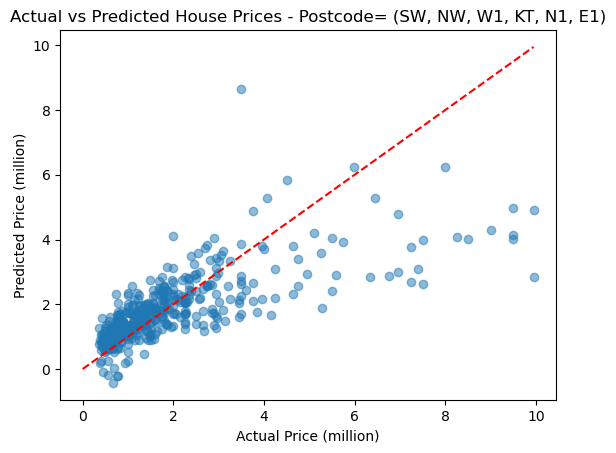

In [678]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')

# Set the plot title and axis labels
plt.title('Actual vs Predicted House Prices - Postcode= (SW, NW, W1, KT, N1, E1)')
plt.xlabel('Actual Price (million)')
plt.ylabel('Predicted Price (million)')

# Show the plot
plt.show()


## KT

In [679]:
# Split the data into training and testing sets - KT postcode 
X = df_kt[['House Type', 'Area in sq ft', 'No. of Bedrooms', 'City/County']]
y = df_kt['Price (million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to encode categorical variables
cat_cols = ['House Type', 'City/County']
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((cat_transformer, cat_cols), remainder='passthrough')

# Fit the linear regression model with column transformer
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))


R-squared: 0.88
Mean squared error: 0.06
Mean absolute error: 0.18


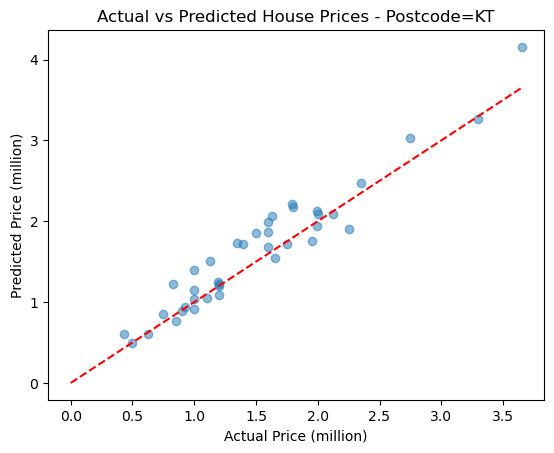

In [680]:
# Create a scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')

# Set the plot title and axis labels
plt.title('Actual vs Predicted House Prices - Postcode=KT')
plt.xlabel('Actual Price (million)')
plt.ylabel('Predicted Price (million)')

# Show the plot
plt.show()

## E1

In [681]:
# Split the data into training and testing sets - E1 postcode 
X = df_e1[['House Type', 'Area in sq ft', 'No. of Bedrooms', 'City/County']]
y = df_e1['Price (million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to encode categorical variables
cat_cols = ['House Type', 'City/County']
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((cat_transformer, cat_cols), remainder='passthrough')

# Fit the linear regression model with column transformer
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))

R-squared: 0.63
Mean squared error: 0.11
Mean absolute error: 0.22


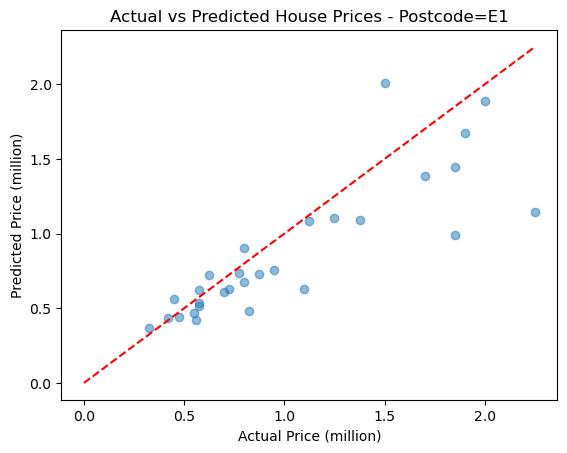

In [682]:
# Create a scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')

# Set the plot title and axis labels
plt.title('Actual vs Predicted House Prices - Postcode=E1')
plt.xlabel('Actual Price (million)')
plt.ylabel('Predicted Price (million)')

# Show the plot
plt.show()

## N1 

In [683]:
# Split the data into training and testing sets - N1 postcode 
X = df_n1[['House Type', 'Area in sq ft', 'No. of Bedrooms', 'City/County']]
y = df_n1['Price (million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to encode categorical variables
cat_cols = ['House Type', 'City/County']
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((cat_transformer, cat_cols), remainder='passthrough')

# Fit the linear regression model with column transformer
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))

R-squared: 0.94
Mean squared error: 0.06
Mean absolute error: 0.18


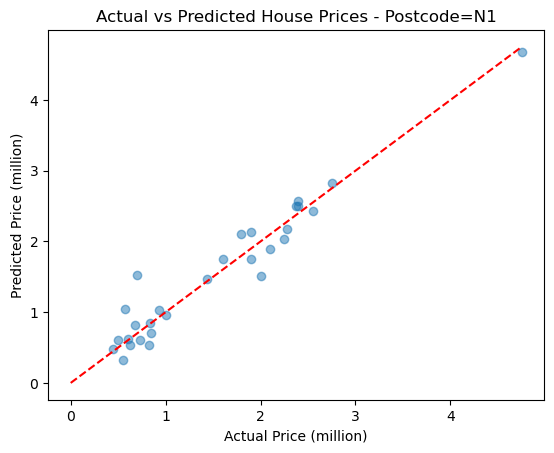

In [684]:
# Create a scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')

# Set the plot title and axis labels
plt.title('Actual vs Predicted House Prices - Postcode=N1')
plt.xlabel('Actual Price (million)')
plt.ylabel('Predicted Price (million)')

# Show the plot
plt.show()

## NW

In [685]:
# Split the data into training and testing sets - NW postcode 
X = df_nw[['House Type', 'Area in sq ft', 'No. of Bedrooms', 'City/County']]
y = df_nw['Price (million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to encode categorical variables
cat_cols = ['House Type', 'City/County']
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((cat_transformer, cat_cols), remainder='passthrough')

# Fit the linear regression model with column transformer
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))

R-squared: 0.76
Mean squared error: 1.27
Mean absolute error: 0.64


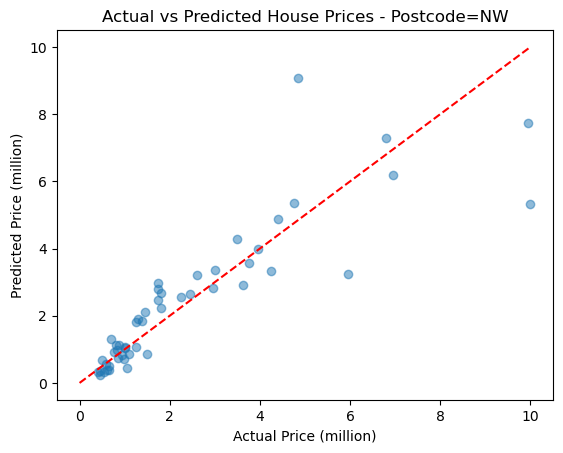

In [686]:
# Create a scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')

# Set the plot title and axis labels
plt.title('Actual vs Predicted House Prices - Postcode=NW')
plt.xlabel('Actual Price (million)')
plt.ylabel('Predicted Price (million)')

# Show the plot
plt.show()

## W1

In [687]:
# Split the data into training and testing sets - W1 postcode 
X = df_w1[['House Type', 'Area in sq ft', 'No. of Bedrooms', 'City/County']]
y = df_w1['Price (million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to encode categorical variables
cat_cols = ['House Type', 'City/County']
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((cat_transformer, cat_cols), remainder='passthrough')

# Fit the linear regression model with column transformer
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))

R-squared: 0.73
Mean squared error: 1.51
Mean absolute error: 0.94


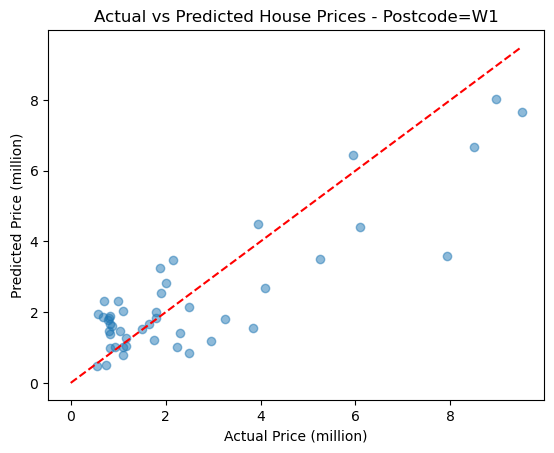

In [688]:
# Create a scatter plot of actual vs predicted prices 
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')

# Set the plot title and axis labels
plt.title('Actual vs Predicted House Prices - Postcode=W1')
plt.xlabel('Actual Price (million)')
plt.ylabel('Predicted Price (million)')

# Show the plot
plt.show()

## SW

In [689]:
# Split the data into training and testing sets - SW postcode 
X = df_sw[['House Type', 'Area in sq ft', 'No. of Bedrooms', 'City/County']]
y = df_sw['Price (million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to encode categorical variables
cat_cols = ['House Type', 'City/County']
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((cat_transformer, cat_cols), remainder='passthrough')

# Fit the linear regression model with column transformer
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))

R-squared: 0.59
Mean squared error: 0.69
Mean absolute error: 0.54


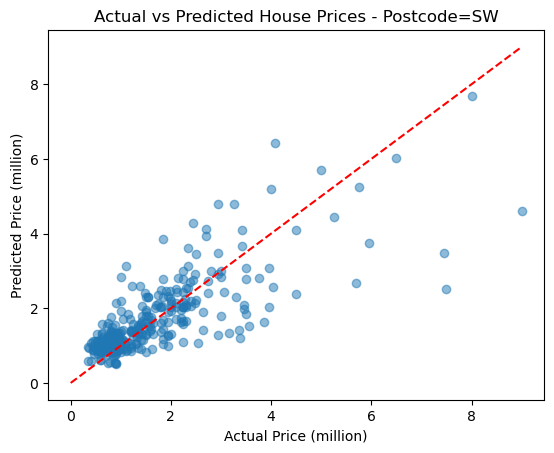

In [690]:
# Create a scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')

# Set the plot title and axis labels
plt.title('Actual vs Predicted House Prices - Postcode=SW')
plt.xlabel('Actual Price (million)')
plt.ylabel('Predicted Price (million)')

# Show the plot
plt.show()

## Conclusion 

1.  We see that increasing no. of bedrooms of a property equals an increase in house price
2. We see that 'Penthouse' is the most expensive house type on average and studio apartments are the cheapest on average
3. We see that an increase in area of the property equals an increase in house price. 
4. We see that West London houses are more expensive. East London houses are cheaper.
5. We see that that house prices increa with Area of house in all regions of london, however this correlation is stronger in certian areas of london then in others.  
6. We see that our abilty to predict house prices based on our dataset features varies depending on the region of london.

Note: We will add to this notebook by doing more analysis in the future.